<a href="https://colab.research.google.com/github/wai4uTAKER/kaggle_/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline
     

In [24]:
import seaborn as sns

In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')
train_df

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:

train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

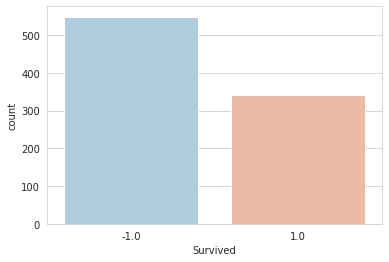

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df,palette='RdBu_r')

In [14]:
train_df = train_df.drop(columns = ['Cabin','Ticket','Name'])
test_df = test_df.drop(columns = ['Cabin','Ticket','Name'])
print(f'Count of NaN in train dataset:\n{train_df.isna().sum()}')

Count of NaN in train dataset:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [16]:
for col in ['Sex','Embarked']:
  le = preprocessing.LabelEncoder() 
  train_df[col] = le.fit_transform(train_df[col])
  test_df[col] = le.fit_transform(test_df[col])


train_df['Survived']=np.where((train_df.Survived==0),-1,train_df.Survived)



In [17]:
for col in ['Age','Fare']:
  mean = train_df[col].mean()
  std = train_df[col].std()
  train_df[col]=(train_df[col] - mean) / std



In [18]:
train_df[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,-1,3,1,-0.530005,1,0,-0.502163,2
1,2,1,1,0,0.571430,1,0,0.786404,0
2,3,1,3,0,-0.254646,0,0,-0.488580,2
3,4,1,1,0,0.364911,1,0,0.420494,2
4,5,-1,3,1,0.364911,0,0,-0.486064,2


In [ ]:
print(f'Count of NaN in train dataset:\n{train_df.isna().sum()}')

Count of NaN in train dataset:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [19]:

knn = KNNImputer(n_neighbors=10) 
df = knn.fit_transform(train_df)
df_test = knn.fit_transform(test_df)
train_df = pd.DataFrame(data=df,columns=train_df.columns)
test_df = pd.DataFrame(data=df_test,columns=test_df.columns)
     

In [20]:
print(f'Count of NaN in train dataset:\n{train_df.isna().sum()}')

Count of NaN in train dataset:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

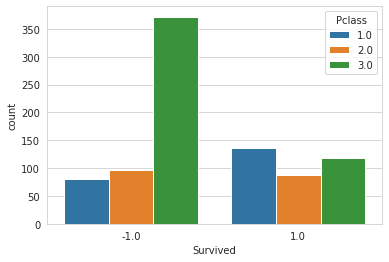

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_df)

<Axes: xlabel='Pclass', ylabel='Age'>

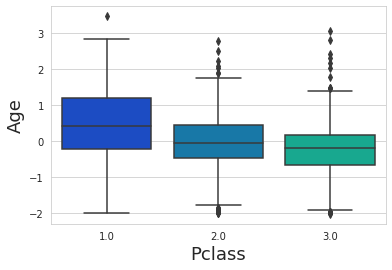

In [30]:

plt.xlabel("PClass",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

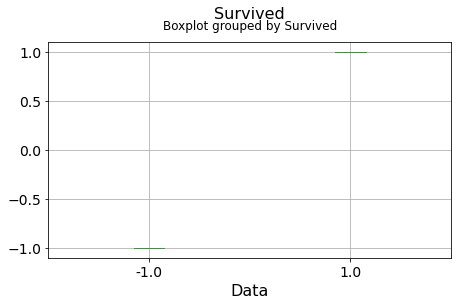

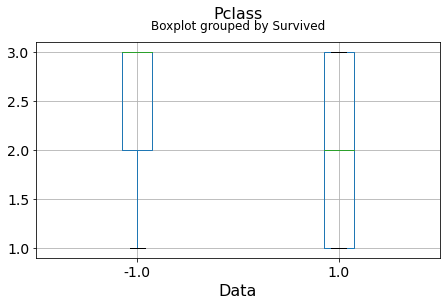

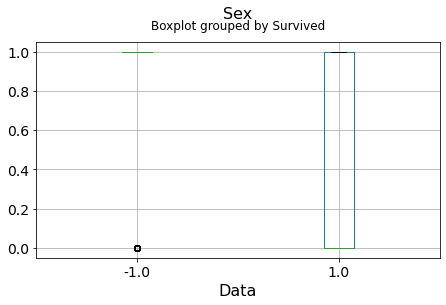

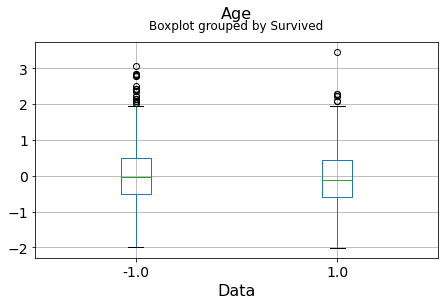

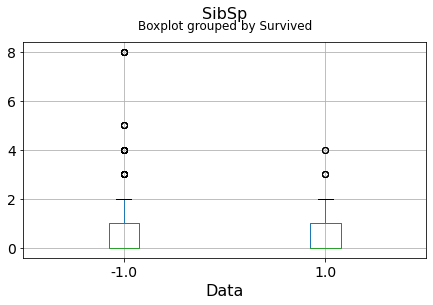

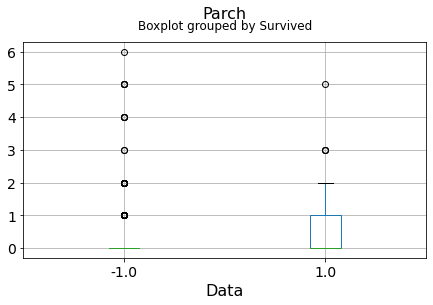

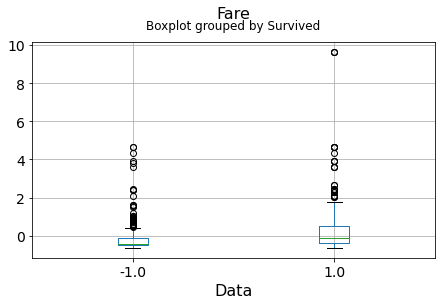

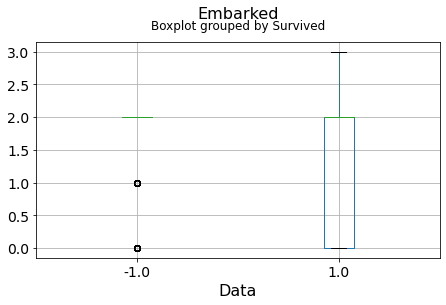

In [22]:
for c in train_df.columns[1:]:
    train_df.boxplot(c,by='Survived',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Data", fontsize=16)

In [ ]:
train_df[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], test_size=0.30, 
                                                    random_state=111)

In [54]:
 lr =(LogisticRegression(C=1/15,tol=1e-4, max_iter=100,n_jobs=4))

In [55]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(classification_report(y_test,pred))     

              precision    recall  f1-score   support

        -1.0       0.82      0.88      0.85       171
         1.0       0.76      0.65      0.70        97

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.80      0.80      0.79       268



Text(0, 0.5, 'Flavanoids')

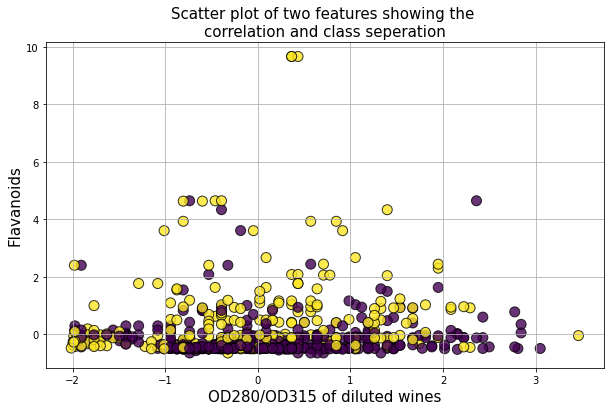

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Age'],train_df['Fare'],c=train_df['Survived'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.5 # Test-set fraction

In [ ]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
train_df['Survived']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
361,362.0,2.0,1.0,29.00,1.0,0.0,27.7208,0.0
644,645.0,3.0,0.0,0.75,2.0,1.0,19.2583,0.0
52,53.0,1.0,0.0,49.00,1.0,0.0,76.7292,0.0
245,246.0,1.0,1.0,44.00,2.0,0.0,90.0000,1.0
509,510.0,3.0,1.0,26.00,0.0,0.0,56.4958,2.0


In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [ ]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
350,-1.0,-1.0,-1.0,-0.614908,-1.0,-1.0,-0.397331,-1.0
878,-1.0,-1.0,-1.0,-0.614908,-1.0,-1.0,-0.397331,-1.0
204,205.0,3.0,1.0,0.536987,0.0,0.0,-0.207675,2.0
2,3.0,3.0,0.0,1.021995,0.0,0.0,-0.210295,2.0
483,484.0,3.0,0.0,3.265159,0.0,0.0,-0.175454,2.0
...,...,...,...,...,...,...,...,...
821,822.0,3.0,1.0,1.082622,0.0,0.0,-0.194839,2.0
449,450.0,1.0,1.0,2.598273,0.0,0.0,0.262796,2.0
643,644.0,3.0,1.0,1.332199,0.0,0.0,0.807575,2.0
739,-1.0,-1.0,-1.0,-0.614908,-1.0,-1.0,-0.397331,-1.0


In [59]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 268 test samples is 63


In [60]:
from sklearn.metrics import classification_report
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

        -1.0       0.81      0.82      0.81       168
         1.0       0.69      0.67      0.68       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [ ]:
labels_train_pred=nbc.predict(X_train)
print(nbc.score(X_train,y_train))

0.7784911717495987


In [ ]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
828,829,3,1,NaN,0,0,-0.492101,1
848,849,2,1,-0.116967,0,1,0.016014,2
844,845,3,1,-0.874204,0,0,-0.473739,2
306,307,1,0,NaN,0,0,1.583290,0
187,188,1,1,1.053308,0,0,-0.113782,2
...,...,...,...,...,...,...,...,...
337,338,1,0,0.777950,0,0,2.058538,0
285,286,3,1,0.227232,0,0,-0.473739,0
40,41,3,0,0.709110,1,0,-0.457389,2
317,318,2,1,1.672866,0,0,-0.366330,2


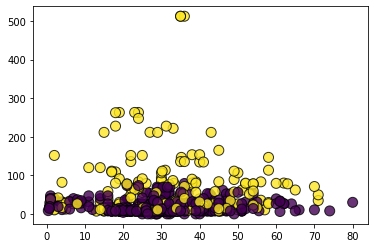

In [ ]:
plt.figure()
plt.scatter(X_train['Age'],X_train['Fare'],c=labels_train_pred,edgecolors='k',alpha=0.8,s=100)

In [ ]:
from sklearn.neighbors import KernelDensity


In [ ]:
y_train.shape

(623,)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
408,409.0,3.0,1.0,-0.598845,0.0,0.0,-0.491598,2.0
761,762.0,3.0,1.0,0.777950,0.0,0.0,-0.504679,2.0
98,99.0,2.0,0.0,0.296072,0.0,1.0,-0.185220,2.0
312,313.0,2.0,0.0,-0.254646,1.0,1.0,-0.124850,2.0
57,58.0,3.0,1.0,-0.082547,0.0,0.0,-0.502582,0.0
...,...,...,...,...,...,...,...,...
85,86.0,3.0,0.0,0.227232,3.0,0.0,-0.329102,2.0
134,135.0,2.0,1.0,-0.323486,0.0,0.0,-0.386454,2.0
96,97.0,1.0,1.0,2.843141,0.0,0.0,0.049302,0.0
223,224.0,3.0,1.0,-0.036654,0.0,0.0,-0.489167,2.0


In [71]:
y_test


374   -1.0
211    1.0
258    1.0
584   -1.0
461   -1.0
      ... 
383    1.0
719   -1.0
291    1.0
432    1.0
228   -1.0
Name: Survived, Length: 268, dtype: float64

In [65]:
# Случайный лес
model = RandomForestClassifier() 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
y_ans = model.predict(X_test)

0.8395522388059702


In [69]:
print(classification_report(y_test,y_ans))

              precision    recall  f1-score   support

        -1.0       0.86      0.89      0.88       171
         1.0       0.80      0.74      0.77        97

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [76]:

clf = RandomForestClassifier(max_depth = 15, n_estimators = 200) # Новый случайный лес(ручная настройка)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(y_test,clf_pred))

0.835820895522388


In [77]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

        -1.0       0.86      0.89      0.87       171
         1.0       0.79      0.74      0.77        97

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



In [ ]:
y_ans

In [98]:
train_df['Survived']=np.where((train_df.Survived==-1),0,train_df.Survived)

In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892.0,3.0,1.0,34.500000,0.0,0.0,7.8292,1.0
1,893.0,3.0,0.0,47.000000,1.0,0.0,7.0000,2.0
2,894.0,2.0,1.0,62.000000,0.0,0.0,9.6875,1.0
3,895.0,3.0,1.0,27.000000,0.0,0.0,8.6625,2.0
4,896.0,3.0,0.0,22.000000,1.0,1.0,12.2875,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,29.166667,0.0,0.0,8.0500,2.0
414,1306.0,1.0,0.0,39.000000,0.0,0.0,108.9000,0.0
415,1307.0,3.0,1.0,38.500000,0.0,0.0,7.2500,2.0
416,1308.0,3.0,1.0,29.166667,0.0,0.0,8.0500,2.0


In [92]:

answer = pd.DataFrame(data = y_ans ,columns=['Survived'])
con = pd.DataFrame(data=test_df['PassengerId'],columns=['PassengerId'])
result = pd.concat([con, answer],axis=1)
result = result.reset_index(drop=True)
result

,PassengerId,Survived
0,892.0,1.0
1,893.0,1.0
2,894.0,1.0
3,895.0,-1.0
4,896.0,-1.0
...,...,...
413,1305.0,NaN
414,1306.0,NaN
415,1307.0,NaN
416,1308.0,NaN


In [93]:
result['Survived']=np.where((result.Survived==-1),0,result.Survived)

In [94]:
result

,PassengerId,Survived
0,892.0,1.0
1,893.0,1.0
2,894.0,1.0
3,895.0,0.0
4,896.0,0.0
...,...,...
413,1305.0,NaN
414,1306.0,NaN
415,1307.0,NaN
416,1308.0,NaN


In [95]:
result.to_csv("predict.csv",index=False)

In [96]:
from google.colab import files
files.download("predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], test_size=0.30, 
                                                    random_state=111)

In [100]:

model_xgb = xgb.XGBClassifier() 
model_xgb.fit(X_train, y_train)
y_pred_new = model_xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_new))

0.7910447761194029


In [82]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [108]:

params = {
    'max_depth' : np.arange(1,6),
    'n_estimators' : np.arange(50,300,50),
    'subsample':np.arange(0,1,0.1),
    'learning_rate':np.arange(0,1,0.05),

}
model_xgb_new = GridSearchCV(model_xgb, param_grid = params, cv = 5)
model_xgb_new.fit(X_train, y_train)
model_xgb_new.best_params_
     

KeyboardInterrupt: ignored

In [115]:
model_xgb = xgb.XGBClassifier(max_depth= 2, n_estimators=50, subsample= 0.9,learning_rate=0.3) 
model_xgb.fit(X_train, y_train)
y_pred_new = model_xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_new))

0.8432835820895522


In [116]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       171
         1.0       0.81      0.74      0.77        97

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



In [ ]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
637,638.0,2.0,1.0,31.000000,1.0,1.0,26.2500,2.0
48,49.0,3.0,1.0,19.633333,2.0,0.0,21.6792,0.0
341,342.0,1.0,0.0,24.000000,3.0,2.0,263.0000,2.0
780,781.0,3.0,0.0,13.000000,0.0,0.0,7.2292,0.0
808,809.0,2.0,1.0,39.000000,0.0,0.0,13.0000,2.0
...,...,...,...,...,...,...,...,...
732,733.0,2.0,1.0,26.433333,0.0,0.0,0.0000,2.0
204,205.0,3.0,1.0,18.000000,0.0,0.0,8.0500,2.0
337,338.0,1.0,0.0,41.000000,0.0,0.0,134.5000,0.0
755,756.0,2.0,1.0,0.670000,1.0,1.0,14.5000,2.0


In [ ]:
X_train[y_train == 1.]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
828,829,3,1,NaN,0,0,-0.492101,1
306,307,1,0,NaN,0,0,1.583290,0
187,188,1,1,1.053308,0,0,-0.113782,2
190,191,2,0,0.158392,0,0,-0.386454,2
383,384,1,0,0.364911,1,0,0.398358,2
...,...,...,...,...,...,...,...,...
507,508,1,1,NaN,0,0,-0.113782,2
65,66,3,1,NaN,1,1,-0.341261,0
786,787,3,0,-0.805364,0,0,-0.497217,2
337,338,1,0,0.777950,0,0,2.058538,0


In [ ]:
X = train_df.drop(columns = ['Survived'])
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
276,277.0,3.0,0.0,1.053308,0.0,0.0,-0.492101,2.0
245,246.0,1.0,1.0,0.984469,2.0,0.0,1.163047,1.0
85,86.0,3.0,0.0,0.227232,3.0,0.0,-0.329102,2.0
524,525.0,3.0,1.0,0.114794,0.0,0.0,-0.502582,0.0
820,821.0,1.0,0.0,1.535186,1.0,1.0,1.233479,2.0
...,...,...,...,...,...,...,...,...
652,653.0,3.0,1.0,-0.598845,0.0,0.0,-0.478351,2.0
755,756.0,2.0,1.0,-1.998356,1.0,1.0,-0.356269,2.0
161,162.0,2.0,0.0,0.709110,0.0,0.0,-0.331114,2.0
775,776.0,3.0,1.0,-0.805364,0.0,0.0,-0.492101,2.0


In [ ]:
print(f'Count of NaN in train dataset:\n{X_train.isna().sum()}')

Count of NaN in train dataset:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [1]:
kde1=KernelDensity(kernel='gaussian',bandwidth=0.3).fit(X_train[y_train == -1])
f1_train=kde1.score_samples(X_train)


kde2=KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_train[y_train == 1])
f2_train= kde2.score_samples(X_train)

labels_train_pred=1-2*(f1_train>f2_train)
acc_train=np.sum(labels_train_pred == y_train)/len(y_train)
print(acc_train)



f1_test=kde1.score_samples(X_test)
f2_test=kde2.score_samples(X_test)

labels_test_pred=1-2*(f1_test>f2_test)
acc_test=np.sum(labels_test_pred == y_test)/len(y_test)


acc_test

NameError: ignored

In [ ]:
acc_train

1.0

In [ ]:
acc_train

0.0